In [173]:
import pandas as pd
import numpy as np

from prophet            import Prophet
from prophet.plot       import add_changepoints_to_plot
from sktime.datasets    import load_airline
from matplotlib         import pyplot as plt

In [174]:
df = pd.DataFrame(load_airline())
df.columns = ['y']
df["ds"]= df.index.to_timestamp()
df = df.reset_index(drop=True)

15:14:15 - cmdstanpy - INFO - Chain [1] start processing
15:14:15 - cmdstanpy - INFO - Chain [1] done processing


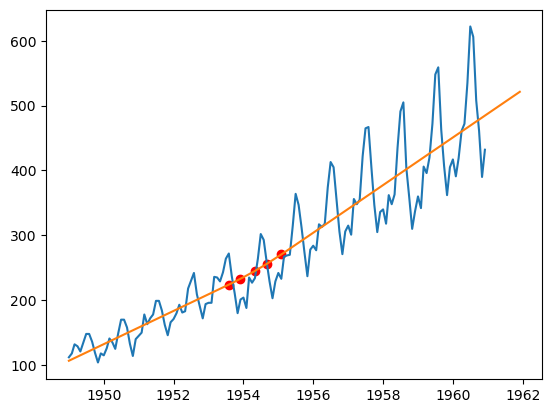

In [175]:
m = Prophet(
            n_changepoints=25,
            changepoint_prior_scale = 0.05,
            changepoint_range=0.8,
            growth='linear'
            )
m.fit(df)

future = m.make_future_dataframe(periods=365)
df_trend = m.setup_dataframe(future.copy())
df_trend["trend"] = m.predict_trend(df_trend)


plt.plot(df["ds"],df["y"])
plt.plot(df_trend["ds"],df_trend["trend"])
threshold=0.01

signif_changepoints = m.changepoints[np.abs(np.nanmean(m.params['delta'], axis=0)) >= threshold]

a = [i for i,value in enumerate(df_trend["ds"]) if value in signif_changepoints.values]

plt.scatter(signif_changepoints,df_trend["trend"].iloc[a],c='r')

# #add 2nd axis 
# ax2 = plt.twinx()
# ax2.plot(df_trend["ds"][1:],np.diff(df_trend["trend"],1),color='g')

# #set second axis color to g
# ax2.tick_params(axis='y', colors='g')

plt.show()

In [176]:
m.params['delta']

array([[-3.77721e-09,  1.10637e-08,  6.48932e-09,  3.68139e-11,
         4.13612e-09,  4.31249e-10,  1.37733e-09,  3.14097e-09,
        -2.02835e-09,  2.41009e-10,  4.78675e-09,  2.79697e-02,
         4.24256e-02,  5.49375e-02,  5.16221e-02,  3.11753e-02,
         5.01564e-03, -9.91419e-10,  6.78758e-09, -1.63825e-10,
         4.95407e-09, -5.48023e-09,  4.94299e-09,  4.50761e-07,
         1.51765e-07]])